/var/folders/st/m5zkxmnx5dl6trhbt3jh6vtc0000gn/T/ipykernel_14648/1169236229.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


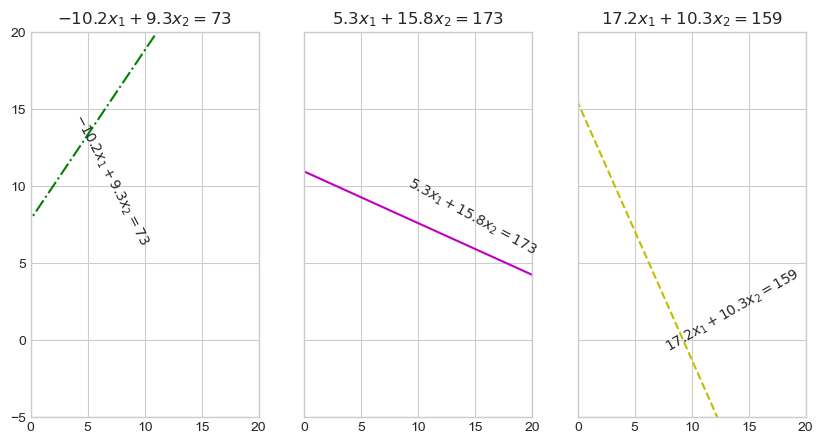

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.colors as mcolors

plt.style.use('seaborn-whitegrid')

eqs = ['$-10.2x_1 + 9.3x_2 = 73$', '$5.3x_1 + 15.8x_2 = 173$', '$17.2x_1 + 10.3x_2 = 159$']

x_1 = np.linspace(-20, 25, 1000)

functs = [(73 + 10.2 * x_1)/9.3, (173 - 5.3 * x_1)/15.8, (159 - 17.2 * x_1)/10.3]
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

# set limits
for i, ax_ in enumerate(axes):
    ax_.set(xlim=(0, 20), ylim=(-5, 20), title=eqs[i])

# Plot annotations
ann_locs = [
    (3.75, 14.5),
    (9, 10), 
    (8, -0.75)
]

rotations = [ -55, -22, 23 ]

for i in range(3):
    axes[i].text(*ann_locs[i], eqs[i], rotation=rotations[i], rotation_mode='anchor',transform_rotates_text=True)    

# remove marks from Y Axis
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# display plots
axes[0].plot(x_1, functs[0], '-.g')
axes[1].plot(x_1, functs[1], '-m')
axes[2].plot(x_1, functs[2], '--y')

# save files
plt.savefig('equations.png')
plt.savefig('equations.jpg')
plt.savefig('equations.svg')

plt.show()

[array([ 2.1644096 , 10.22333096]), array([ 2.74243453, 10.85729379]), array([3.36280333, 9.82133812])]


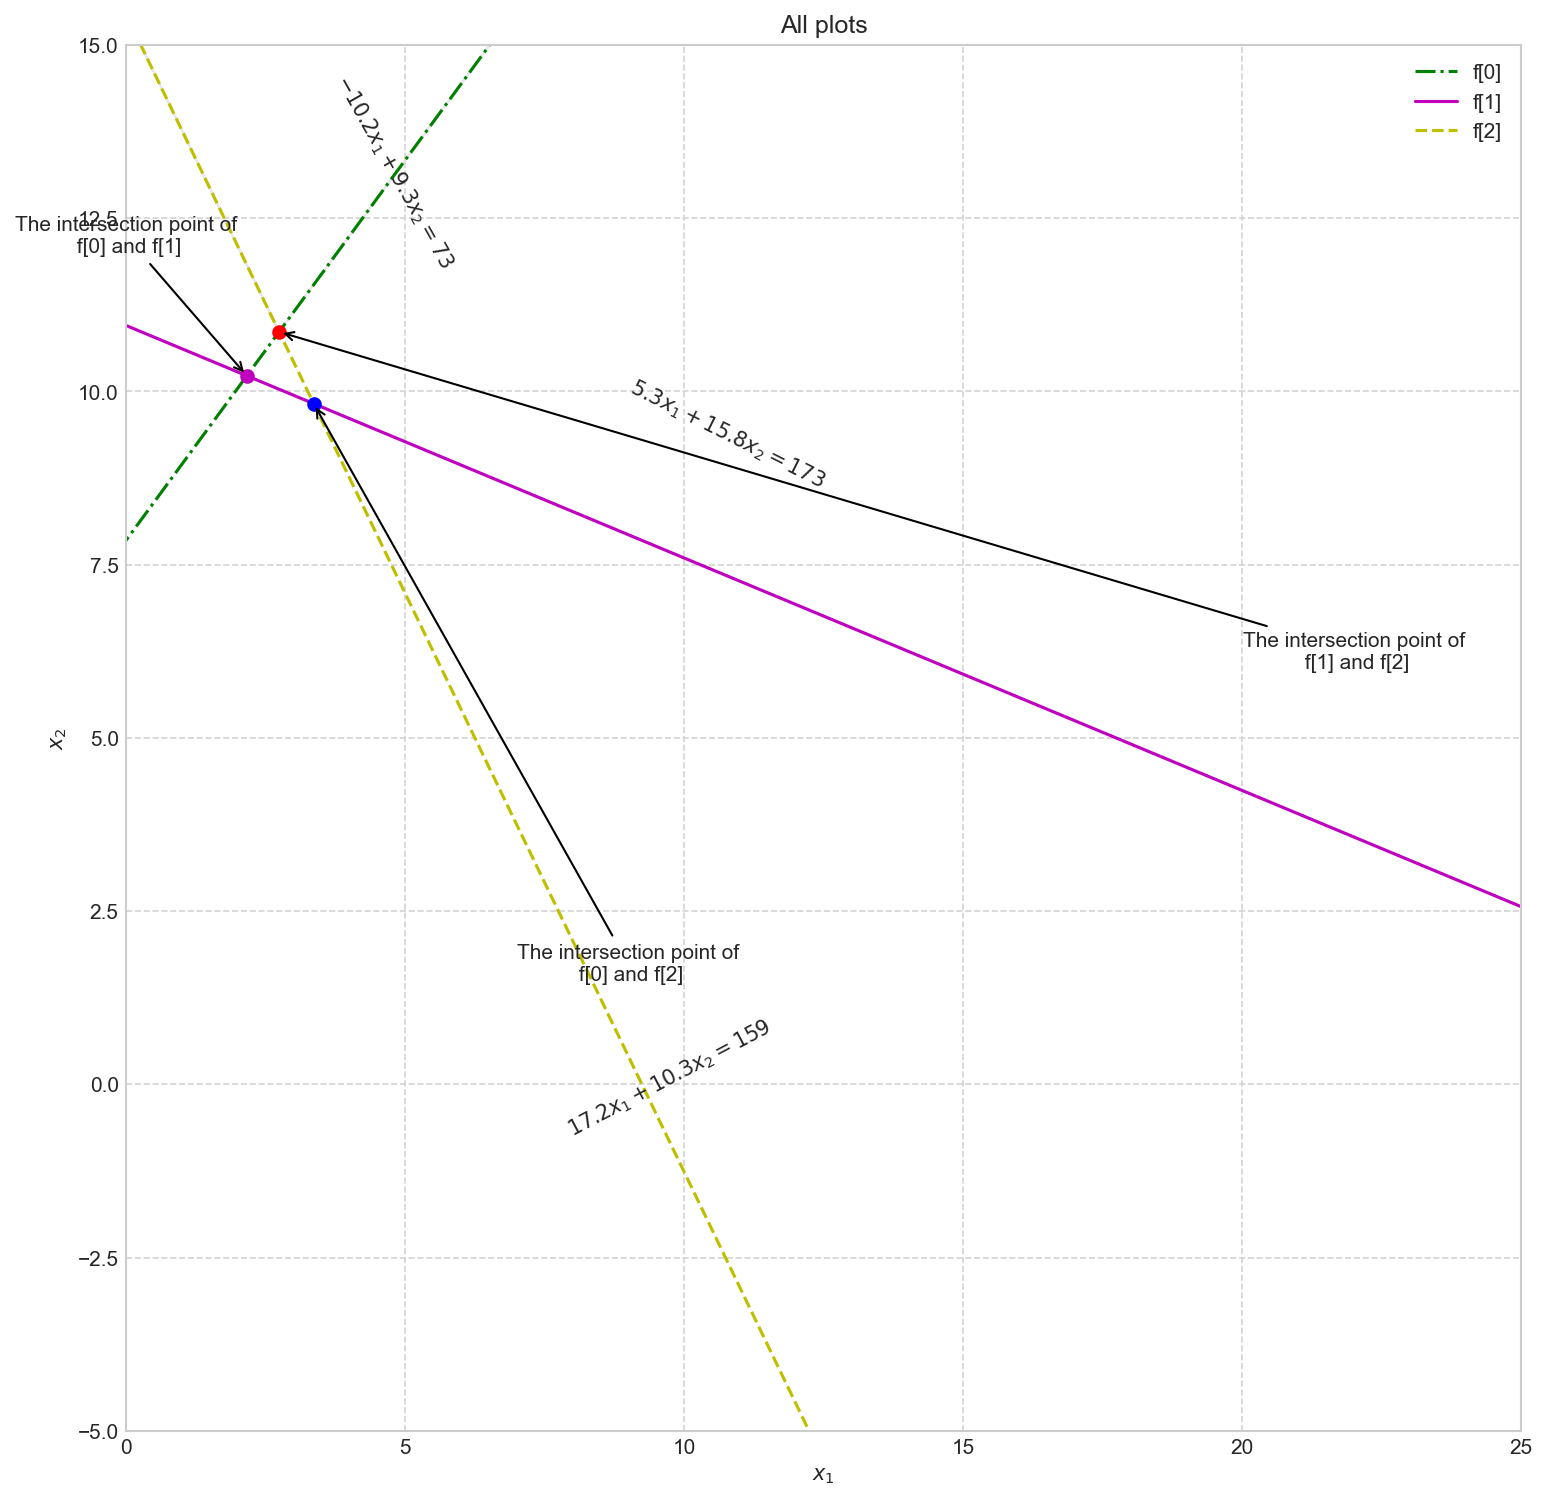

In [18]:
matrices = [
    np.array([[-10.2, 9.3],[5.3, 15.8]]),
    np.array([[-10.2, 9.3],[17.2, 10.3]]),
    np.array([[5.3, 15.8],[17.2, 10.3]])
]
rhs = [
    np.array([73, 173]),
    np.array([73, 159]),
    np.array([173, 159])
]

solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]

print(solutions)

fig = plt.figure(figsize=(12, 12), dpi=150)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(0, 25), ylim=(-5, 15), xlabel='$x_1$', ylabel='$x_2$', title='All plots')
ax.grid(linestyle='--', color='lightgrey')

ax.plot(x_1, functs[0], '-.g', label='f[0]')
ax.plot(x_1, functs[1], '-m', label='f[1]')
ax.plot(x_1, functs[2], '--y', label='f[2]')


for i, ax_ in enumerate(axes):
    ax.text(*ann_locs[i], eqs[i], rotation=rotations[i], rotation_mode='anchor',transform_rotates_text=True) 

ax.plot(*solutions[0], marker='o', color='m')
ax.plot(*solutions[1], marker='o', color='r')
ax.plot(*solutions[2], marker='o', color='b')

y = np.maximum(functs[0], functs[2])
y_1 = np.maximum(functs[1], y)
plt.fill_between(x_1, y, y_1, color='lightgrey', alpha=0.5)

ax.annotate(f"The intersection point of\n f[0] and f[1]", ha="center", xy=solutions[0], xytext=(0, 12), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[1] and f[2]", ha="center", xy=solutions[1], xytext=(22, 6), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[0] and f[2]", ha="center", xy=solutions[2], xytext=(9, 1.5), arrowprops=dict(arrowstyle="->"))

ax.legend()

plt.savefig('equations.png')
plt.savefig('equations.jpg')
plt.savefig('equations.svg')
